In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../datasets/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X=data.iloc[:,2:4].values

In [4]:
y=data.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 1.97875775, -1.40471119],
       [ 0.4009288 , -0.48181994],
       [-1.17690015, -0.54136131],
       [-0.09214275, -0.45204925],
       [ 0.4009288 ,  2.34639519],
       [-0.28937136, -1.40471119],
       [-0.28937136, -0.69021474],
       [ 0.99261466, -1.04746296],
       [-1.76858601, -0.63067337],
       [-1.17690015, -0.80929748],
       [-1.17690015, -1.61310599],
       [ 0.00647156, -0.33296651],
       [ 1.28845759, -1.40471119],
       [-0.78244291,  1.36396256],
       [-0.28937136, -1.49402325],
       [ 0.49954311,  1.24487982],
       [-0.97967153,  0.44107131],
       [ 0.4009288 ,  0.2624472 ],
       [ 0.30231449,  0.50061268],
       [-0.97967153, -0.33296651],
       [ 0.89400035, -1.40471119],
       [-0.09214275,  2.25708313],
       [ 2.07737206,  0.53038337],
       [ 0.89400035, -1.34516982],
       [ 0.30231449, -0.21388377],
       [-1.07828584,  0.41130063],
       [ 1.09122897,  0.470842  ],
       [-1.37412877, -1.28562845],
       [ 0.99261466,

In [8]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.88014344,  0.11359377],
       [ 1.88014344, -0.30319583],
       [ 0.99261466,  2.1082297 ],
       [ 0.20370018, -0.39250788],
       [ 2.07737206,  0.38152994],
       [-1.07828584,  0.56015406],
       [-0.78244291,  0.50061268],
       [-0.09214275, -0.54136131],
       [-1.37412877, -0.3627372 ],
       [-0.09214275,  0.02428172],
       [-0.58521429,  1.92960559],
       [ 0.79538604,  0.76854885],
       [ 0.99261466, -1.10700434],
       [ 0.89400035,  1.27465051],
       [-1.27551446,  0.2624472 ],
       [-1.76858601,  0.470842  ],
       [-0.48659998, -1.25585776],
       [ 0.99261466,  1.81052285],
       [-1.57135739, -1.28562845],
       [ 0.00647156, -0.45204925],
       [ 1.97875775, -0.95815091],
       [-0.09214275, -0.00548897],
       [-0.78244291,  1.92960559],
       [ 1.28845759,  2.25708313],
       [ 0.79538604, -1.25585776],
       [-0.58521429, -1.55356462],
       [-1.07828584, -1.5833353 ],
       [-1.17690015,  0.29221789],
       [-0.48659998,

In [9]:
# 1st method
np.sqrt(X_train.shape[0])

17.88854381999832

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)

In [11]:
# Train our model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [12]:
y_pred=knn.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[47,  6],
       [ 2, 25]])

# 1. Decision Boundary for Knn
## 1. What is Decision Boundary
In a classification problem with two or more classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two or more sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class.


Important Points
* We can draw decision boundary for all the classification algorithms including Neural networks
*Decision boundary can be both linear(as in the case of SVM) or non-linear(as in the case of Decision tree classifier or Knn)
* Decision boundaries are not always clear cut. That is, the transition from one class in the feature space to another is not discontinuous, but gradual. This effect is common in fuzzy logic based classification algorithms, where membership in one class or another is ambiguous.
* For higher dimension problems the decision boundary acts as a hyperplane(for linear ones)
## 2. Vornoi Diagram
In mathematics, a Voronoi diagram is a partitioning of a plane into regions based on distance to points in a specific subset of the plane.
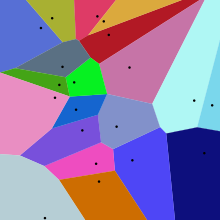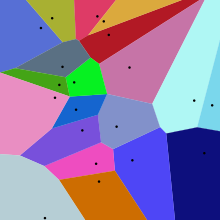


## 3. Steps to plot Decision Boundary for Knn(Assuming 2 input cols)
Train the classifier on the training set.
Create a uniform grid(with the help of Numpy Meshgrids) of points that densely cover the region of input space containing the training set.
Classify each point on the grid. Store the results in an array A, where Aij contains the predicted class for the point at row i, column j on the grid.
Plot the array as an image, where each pixel corresponds to a grid point and its color represents the predicted class. The decision boundary can be seen as contours where the image changes color.
Finally print out the training data with their respective color on the same contour


# Step 2: Creating a Meshgrid

In [15]:
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)


XX,YY=np.meshgrid(a,b)

# Step 3: Classifiying every point on the meshgrid

In [16]:
input_array=np.array([XX.ravel(),YY.ravel()]).T

labels=knn.predict(input_array)

# Step 4: Plotting the array as an image

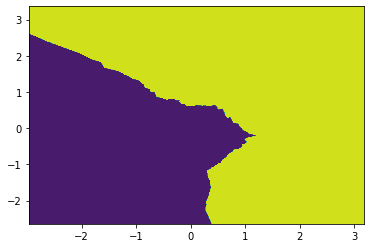

In [17]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

# Step 5: Plotting all the training data on the plot

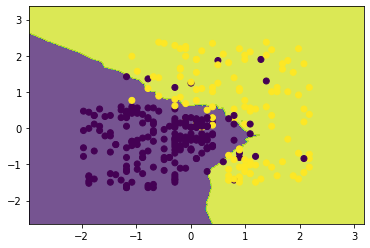

In [18]:
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)